# How to Load Natural Stimulus Data

In [4]:
import numpy as np
import os
import h5py
import pyret
import binary     # in igor >> recording
from load_natural_stimulus import *

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [5]:
data_dir = os.path.expanduser('~/Documents/Stanford/00 Baccus Lab/Data 2015_07_02/')
stim_file = data_dir + 'natural_scenes_stimulus_compressed.h5'
f = h5py.File(stim_file)

In [6]:
f.keys()

[u'images', u'spikes', u'stimulus']

In [7]:
natural_stimuli = NaturalScenesStimulus(f['images'], f['stimulus'])

In [10]:
natural_stimuli[0].shape

(500, 500)

In [13]:
f['stimulus']

<HDF5 dataset "stimulus": shape (541200, 3), type "<i4">

In [12]:
natural_stimuli[0]

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)

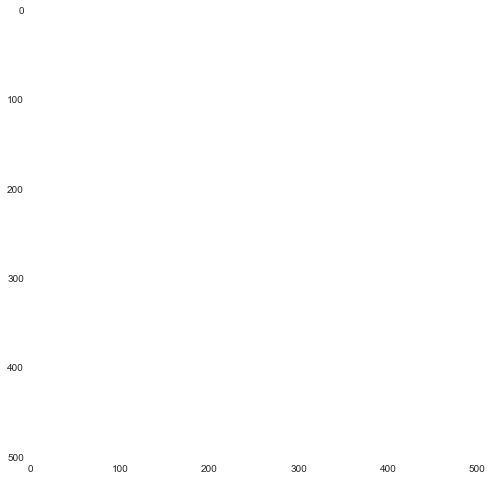

In [11]:
plt.imshow(natural_stimuli[0])